In [3]:
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt

In [27]:
N = 2 #number of params that are being plastically controlled
squish= np.zeros((50,N)) #0: not squished, 1: squished
for i in range(50):
    filename = '../Cpp/%s/bestindsfastsuper.dat'%i
    with open(filename,"r") as f:
        generation = np.loadtxt(islice(f, 1))
        [gen,phen] = np.loadtxt(islice(f, 2))
        bounds = gen[N:N+(N*2)]
        for k in range(N):
            if bounds[k] > bounds[k+N]:
                squish[i,k] = 1

print(np.sum(squish[:,0]),np.sum(squish[:,1]))

print(len(np.where(squish.any(axis=1)==1)[0]))


30.0 26.0
40


array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 40, 41,
       44, 45, 46, 47, 48, 49])

Maybe I've figured out why the squishing is so hard to get rid of. Once you get squished, not only can you no longer move the UB down, you cannot move the LB up. The only way to fix this does seem to be to change the encoding

[2. 1. 0. 2. 2. 1. 1. 1. 1. 1. 2. 0. 1. 2. 2. 1. 1. 1. 0. 2. 1. 0. 0. 0.
 0. 2. 1. 1. 2. 0. 1. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 0. 1. 0. 1. 1.
 2. 0.]
24 12


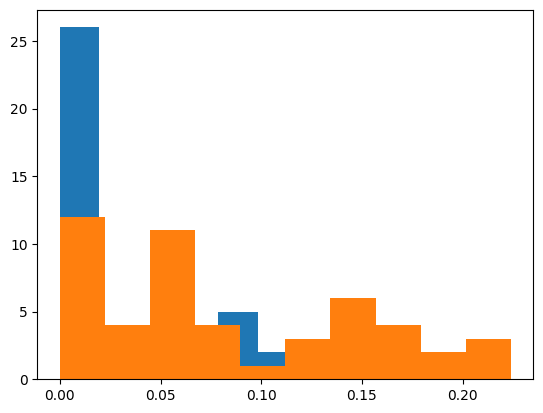

In [12]:
#compare with the genomes that evolved with the new (range-based) encoding
N = 2 #number of params that are being plastically controlled
rangevals = np.zeros((2,50))
squishnum = np.zeros((50))
for i in range(101,150):
    filename = '../Cpp/%s/bestindsrangeencoding.dat'%i
    with open(filename,"r") as f:
        generation = np.loadtxt(islice(f, 1))
        [gen,phen] = np.loadtxt(islice(f, 2))
        ranges = phen[2*N:3*N]
        rangevals[:,i-101] = ranges
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i-101] += 1

plt.hist(rangevals[0])
plt.hist(rangevals[1])
print(squishnum)
print(len(np.where(squishnum==1)[0]),len(np.where(squishnum==2)[0]))